<a href="https://colab.research.google.com/github/jithendra795/HeartDiseasePredction_LogisitcRegression/blob/main/HeartDiseasePredction_LogisitcRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
heart_df = pd.read_csv('/content/drive/MyDrive/HEART DISEASE/framingham.csv')

In [12]:
heart_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [13]:
heart_df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [14]:
count=0
for i in heart_df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(heart_df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  582
since it is only 14 percent of the entire dataset the rows with missing values are excluded.


In [15]:
#Imputation : The NAN or NULL values in the records will be replaced with proper values depending on the nature of data
#Find the null values
heart_df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [16]:
count=0
for i in heart_df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is : ', count)
print('Percentage of rows with missing values : ',round((count/len(heart_df.index))*100),'%')

Total number of rows with missing values is :  582
Percentage of rows with missing values :  14 %


In [17]:
#The data missing is 14% of the total data which is high and we need to impute the values

In [18]:
heart_df['cigsPerDay'].isnull().sum()

29

In [19]:
# There are 29 records with 'cigsPerDay' and we will replace them with mean value
import math
mean_value=heart_df['cigsPerDay'].mean()
mean_value = math.floor(mean_value)
heart_df['cigsPerDay']=heart_df['cigsPerDay'].fillna(mean_value)

In [20]:
#Null values have been replaced by mean value
heart_df['cigsPerDay'].isnull().sum()

0

In [21]:
#Find the education counts of different types
heart_df['education'].value_counts()

1.0    1720
2.0    1253
3.0     689
4.0     473
Name: education, dtype: int64

In [22]:
#the education 1.0 is maximum numbers and we can replace null values for education with mode value
heart_df['education'].fillna(heart_df['education'].mode()[0], inplace=True)

In [23]:
heart_df['education'].value_counts()

1.0    1825
2.0    1253
3.0     689
4.0     473
Name: education, dtype: int64

In [24]:
#Fill the null values in glucose column with mean value
mean_value=heart_df['glucose'].mean()
heart_df['glucose']=heart_df['glucose'].fillna(mean_value)

In [25]:
heart_df.isnull().sum()

male                0
age                 0
education           0
currentSmoker       0
cigsPerDay          0
BPMeds             53
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            50
sysBP               0
diaBP               0
BMI                19
heartRate           1
glucose             0
TenYearCHD          0
dtype: int64

In [26]:
#fill the BPMeds column which has null values with mode
heart_df['BPMeds'].fillna(heart_df['BPMeds'].mode()[0], inplace=True)

In [27]:
#fill the heartRate column which has null values with mode
heart_df['heartRate'].fillna(heart_df['heartRate'].mode()[0], inplace=True)

In [28]:
heart_df.isnull().sum()

male                0
age                 0
education           0
currentSmoker       0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            50
sysBP               0
diaBP               0
BMI                19
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64

In [29]:
#fill the BMI column which has null values with median
heart_df['BMI']=heart_df['BMI'].fillna(25.4)
#a = heart_df.fillna(heart_df['BMI'].median())
#heart_df['BMI'].fillna(25.4)

In [30]:
heart_df['BMI'].median()

25.4

In [31]:
#fill the totChol column which has null values with mean
mean_value=heart_df['totChol'].mean()
heart_df['totChol']=heart_df['totChol'].fillna(mean_value)

In [32]:
heart_df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [33]:
#Imputation completed as we have no columns with null values in the data or records

In [34]:
heart_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [35]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()

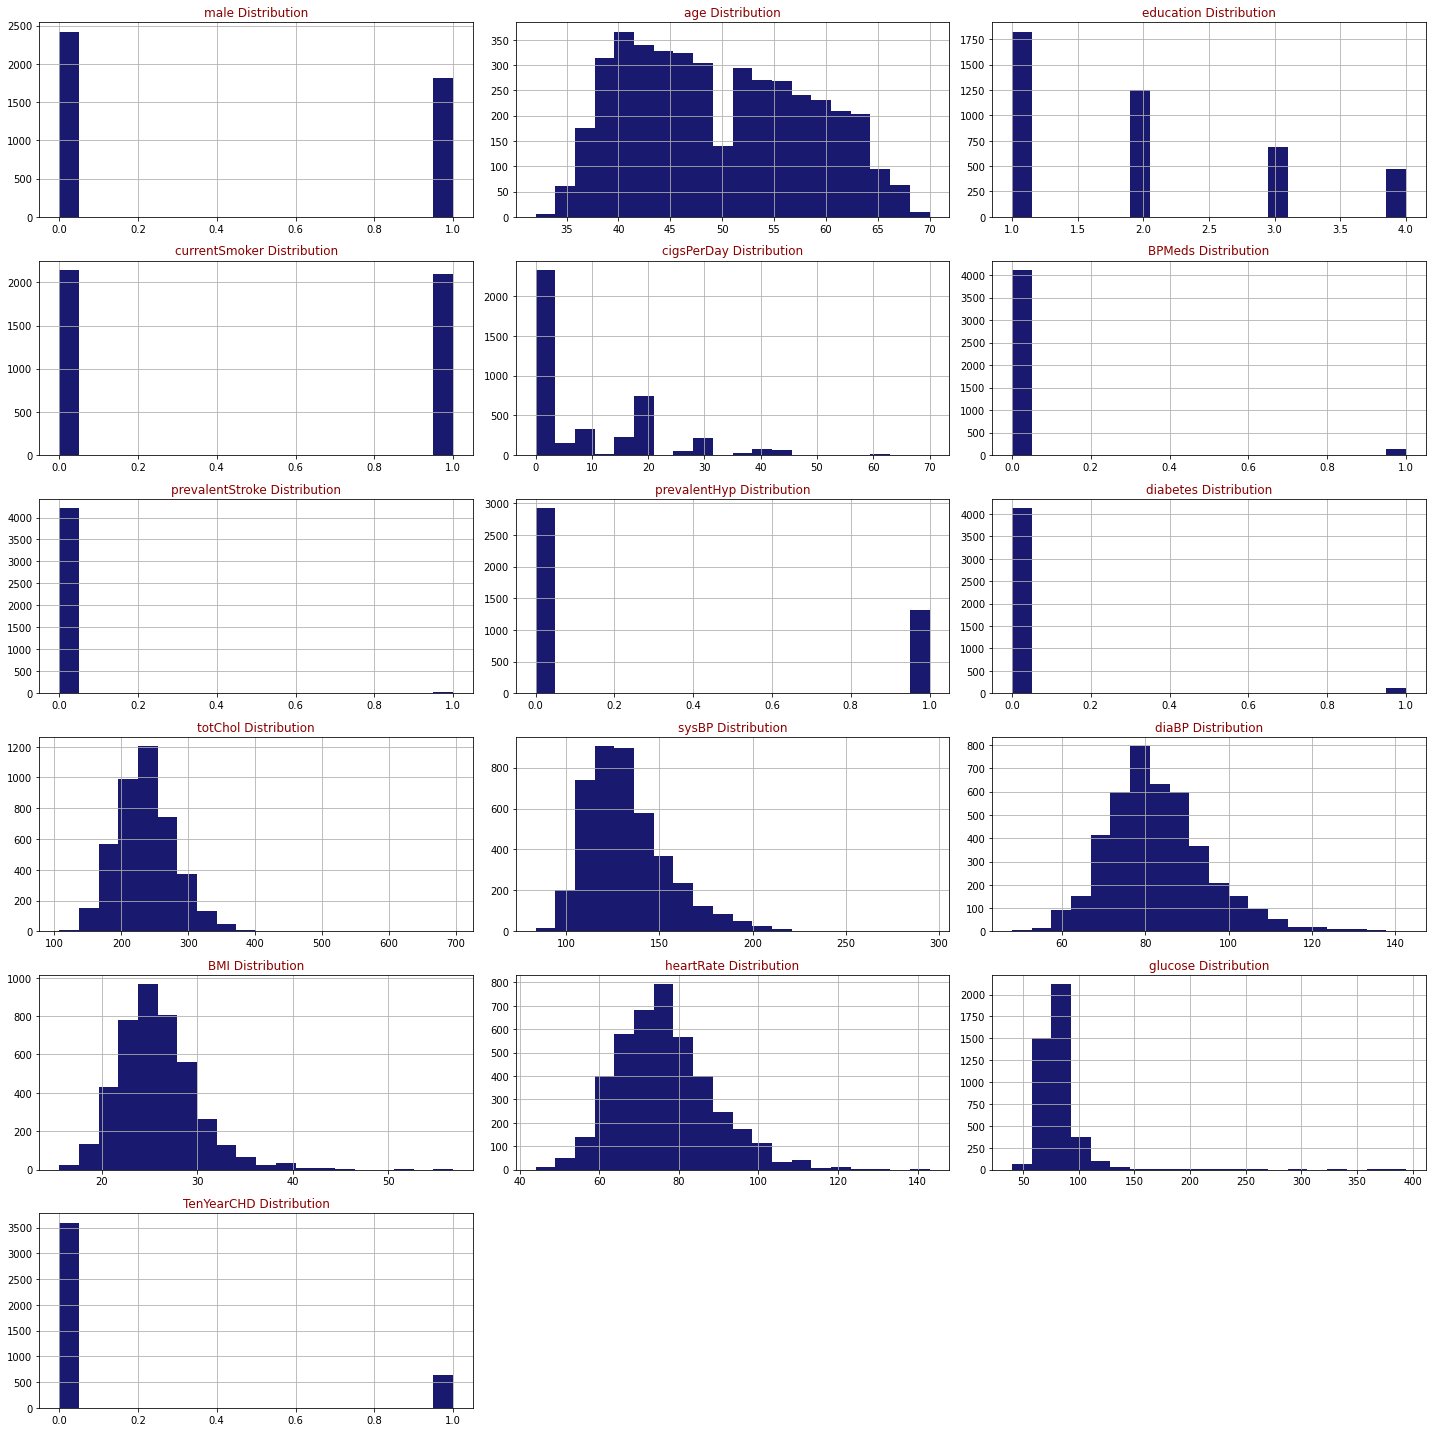

In [36]:
draw_histograms(heart_df,heart_df.columns,6,3)

In [37]:
heart_df.TenYearCHD.value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

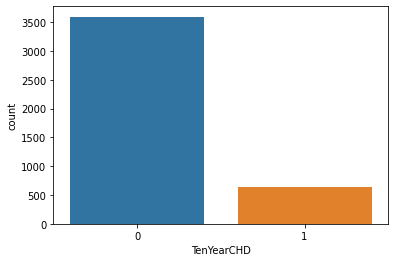

In [38]:
sn.countplot(x='TenYearCHD',data=heart_df)

In [39]:
heart_df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.955189,0.494104,9.005896,0.029245,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.799005,75.878774,81.963655,0.151887
std,0.495027,8.572942,1.018522,0.500024,11.881610,0.168513,0.076569,0.462799,0.158280,44.327521,22.033300,11.910394,4.070775,12.023937,22.831748,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [40]:
import sklearn
new_features=heart_df[['age','male','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)

In [41]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [42]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.8514150943396226

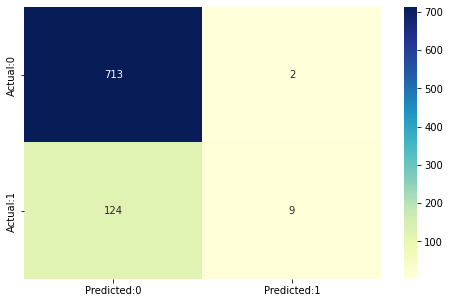

In [43]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [44]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [45]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8514150943396226 
 The Missclassification = 1-Accuracy =  0.1485849056603774 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.06766917293233082 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9972027972027973 
 Positive Predictive value = TP/(TP+FP) =  0.8181818181818182 
 Negative predictive Value = TN/(TN+FN) =  0.8518518518518519 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  24.191729323308703 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.9349460608041843


In [46]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print('---------')
print(classification_report(y_test, y_pred))  

[[713   2]
 [124   9]]
---------
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       715
           1       0.82      0.07      0.12       133

    accuracy                           0.85       848
   macro avg       0.84      0.53      0.52       848
weighted avg       0.85      0.85      0.79       848

